# introduction to GIS programming
GIS is a technological field that is use to store, creates, manages, analyzes,spatial data along with none spatial attributes
# spatial data
1. vector (points,lines and polygons)
2. raster
# GIS programming 
it is writting code or programms tha automate (storage,creation,analysis and management) of spatial data.
# area of spatialization in GIS programming
1. web mapping
2. Desktop GIS
3. GIS database
# why do i need GIS programming
in most cases existing software and programms was written to fit individual needs at that particular time hence some functionalities might not address currect problen on hand.

1. make work easy by automating boring process (combinening different process that you could have been waiting and clicking in existing software)
2. flexibility - you can be able to manibulate process to fit your desire
3. safes on time


# PYTHON PROGRAMMIN FOR GIS

# best libraries to start with and not limited to
1. Pandas
2. matplotlib
3. geopandas
4. shapely
5. rasterio
6. numpy

# Pandas
## Reading data from Different file types to pandas

1. CSV----> read_csv()
2. JASON --->read_json()
3. HTML ---> READ_HTML()
4. XML----> read_xml()
5. SQL----> read_sql()
6. excel----> read_excel()


## Creating a DataFrame

# importing required libraries

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely.geometry
import numpy as np
from shapely.geometry import Point,Polygon

data=pd.DataFrame()
print(data)

Empty DataFrame
Columns: []
Index: []


# Dictionary list of coordinates

In [4]:
coordinates={
    "x":[2,3,4,5,6,],
    "y":[7,8,9,0,11]
}

In [6]:
#DataFrame creation
df=pd.DataFrame(coordinates)
df

,x,y
0,2,7
1,3,8
2,4,9
3,5,0
4,6,11


In [7]:
#creating a dataframe from a dictionary of series
x=pd.Series([1,2,3,4,5,6,7,8,9])
y=pd.Series([1,2,3,4,5,6,7,8,9])
#DtataFrame
df1=pd.DataFrame({"x":x,'y':y})
df1

,x,y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9


In [8]:
#creating from lis
data=[
    [1,2],
    [2,2],
    [3,4],
    [2,7]
]
df2=pd.DataFrame(data,columns=["x","y"])
df2

,x,y
0,1,2
1,2,2
2,3,4
3,2,7


In [66]:
#fromlist of dictionaries
data=[
    {"name":"Amos","age":23},
    {"name":"John","age":20}
]
df3=pd.DataFrame(data,index=['a','b'])
df3

,name,age
a,Amos,23
b,John,20


# creating using WELL KNOWN TEXT

In [67]:
pol1 = shapely.wkt.loads('POLYGON ((0 0, 0 -1, 7.5 -1, 7.5 0, 0 0))')
pol2 = shapely.wkt.loads('POLYGON ((0 1, 1 0, 2 0.5, 3 0, 4 0, 5 0.5, 6 -0.5, 7 -0.5, 7 1, 0 1))')

In [68]:
s = gpd.GeoSeries([pol1, pol2], crs=4326)
s

0    POLYGON ((0.00000 0.00000, 0.00000 -1.00000, 7...
1    POLYGON ((0.00000 1.00000, 1.00000 0.00000, 2....
dtype: geometry

# ADDING attributes

In [69]:
d={'name':['a','b'],'location':['south','north'],'geometry':s}
d

{'name': ['a', 'b'],
 'location': ['south', 'north'],
 'geometry': 0    POLYGON ((0.00000 0.00000, 0.00000 -1.00000, 7...
 1    POLYGON ((0.00000 1.00000, 1.00000 0.00000, 2....
 dtype: geometry}

In [76]:
gdfd=gpd.GeoDataFrame(d)
gdfd

,name,location,geometry
0,a,south,"POLYGON ((0.00000 0.00000, 0.00000 -1.00000, 7..."
1,b,north,"POLYGON ((0.00000 1.00000, 1.00000 0.00000, 2...."


# creating random points
creating a function that take 2 arguments
1. polygon
2. number of random points
polygon has xmin,ymin, xmax,ymax

In [35]:
def random1(poly, number):
    xmin,ymin, xmax,ymax = poly.bounds
  
    x=np.random.uniform(xmin,xmax,number)
  
    y=np.random.uniform(ymin,ymax,number)
    return x,y

In [50]:
polygon = Polygon([[0,0],[0,20],[30,20],[30,-0.5],[0,0]])
x,y=random1(polygon,100)
x = x.round(3)
y= y.round(3)


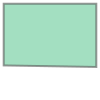

In [51]:
polygon

In [54]:
y

array([14.384, 19.765,  3.289, 12.768,  8.746, 10.959, 15.951, 17.5  ,
        3.957,  7.913,  2.576, 11.499, 10.44 , 14.402, 16.693, 16.682,
       19.172,  6.554,  7.278, 17.9  , 15.691,  4.239, 17.355,  2.164,
       15.823,  9.796,  8.546, 14.262, 11.547,  7.254,  9.544, 16.096,
       13.859,  4.684,  6.784,  0.258, 13.675,  8.271, 15.636, 14.432,
        2.324, 13.926,  4.787, 16.555, 16.926,  0.972,  4.307, 15.915,
        4.095, -0.051, 12.822,  2.105, 19.403,  0.766,  4.123, 11.379,
       15.37 , 11.02 ,  5.189, 17.131, 18.468,  1.417, 14.342,  9.315,
       15.336,  0.405, 19.3  ,  4.773, 16.799,  4.751,  3.381, 19.399,
       11.547,  6.115, 16.43 , 17.519,  0.639, -0.499,  6.616, 16.073,
        3.351, 13.736, 15.215,  3.189, 11.413, 11.058, 14.748,  3.233,
       10.953, 11.455,  9.225, 11.45 , 17.192, 17.526, 17.48 , 16.705,
        1.518, 10.194, 12.24 ,  9.373])

In [58]:
df = pd.DataFrame()
df['geometry'] = list(zip(x,y))
df

,geometry
0,"(17.835, 14.384)"
1,"(27.96, 19.765)"
2,"(27.68, 3.289)"
3,"(7.487, 12.768)"
4,"(4.87, 8.746)"
...,...
95,"(3.193, 16.705)"
96,"(18.221, 1.518)"
97,"(22.668, 10.194)"
98,"(15.182, 12.24)"


# converting list of cordinates to Shapes

In [59]:
df['geometry'] = df['geometry'].apply(Point)
df

,geometry
0,POINT (17.835 14.384)
1,POINT (27.96 19.765)
2,POINT (27.68 3.289)
3,POINT (7.487 12.768)
4,POINT (4.87 8.746)
...,...
95,POINT (3.193 16.705)
96,POINT (18.221 1.518)
97,POINT (22.668 10.194)
98,POINT (15.182 12.24)


# converting pandas dataframe to Geopandas dataframe

In [62]:
dta=gpd.GeoDataFrame(df)

In [63]:
dta

,geometry
0,POINT (17.83500 14.38400)
1,POINT (27.96000 19.76500)
2,POINT (27.68000 3.28900)
3,POINT (7.48700 12.76800)
4,POINT (4.87000 8.74600)
...,...
95,POINT (3.19300 16.70500)
96,POINT (18.22100 1.51800)
97,POINT (22.66800 10.19400)
98,POINT (15.18200 12.24000)


# plotting Vector data

<AxesSubplot:>

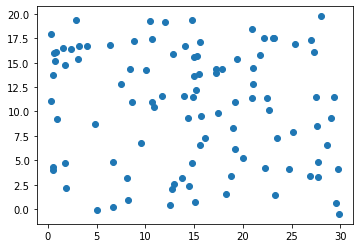

In [64]:
dta.plot()

<AxesSubplot:>

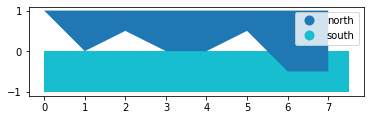

In [77]:
gdfd.plot(column='location',legend=True)

# writting
1. shapefile .shp
2. geodatabase
3. geopackage

In [ ]:
gdfd.to_file('out.shp',encoding='utf-8')

In [ ]:
gdfd.to_file('geo.gpkg', driver='GPKG')